In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('housing data.csv')

In [3]:
df

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Creo el dataframe y me doy cuenta que las columnas son valores

In [4]:
df = df.rename(columns={'0.00632' :'CRIM','18.00' : 'ZN', '2.310' : 'INDUS', '0' : 'CHAS', '0.5380' : 'NOX', '6.5750':'RM', '65.20':'AGE', '4.0900':'DIS', '1':'RAD', '296.0':'TAX', '15.30':'RTRATIO', '396.90':'B', '4.98':'LSTAT', '24.00':'MEDV'})

In [5]:
nueva_fila = pd.Series({'CRIM':0.00632, 'ZN':18, 'INDUS':2.310, 'CHAS':0, 'NOX':0.538, 'RM':6.575, 'AGE':65.20, 'DIS':4.09, 'RAD':1, 'TAX':296, 'RTRATIO':15.3, 'B':396.9, 'LSTAT':4.98, 'MEDV':24})
df = df.append(nueva_fila, ignore_index=True)

D:\users\ciberintegra_14\AppData\Local\Temp\ipykernel_16552\1904589545.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nueva_fila, ignore_index=True)


In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,RTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
504,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


Cambio el nombre de las columnas por aquellas que ven abajo, y agrego los datos en una nueva fila.

## Datos de vivienda de Boston
#### Valor de la vivienda en los suburbios de Boston.

    1. CRIM: tasa de criminalidad per cápita por ciudad
    2. ZN: proporción de suelo residencial zonificado para lotes de más 25,000 pies cuadrados.
    3. INDUS: proporción de acres de negocios no minoristas por ciudad
    4. CHAS: variable ficticia de Charles River (= 1 si el tramo limitarío; 0 en caso contrario)
    5. NOX: concentración de óxidos nítricos (partes por 10 millones)
    6. RM: número medio de habitaciones por vivienda
    7. AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
    8. DIS: distancias ponderadas a cinco centros de empleo de Boston
    9. RAD: índice de accesibilidad a carreteras radiales
    10.TAX: tasa de impuesto a la propiedad de valor total por $10,000.
    11.PTRATIO: ratio alumnos-profesor por localidad
    12.B: 1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad
    13.LSTAT: % de estatus más bajo de la población.
    14.MEDV: Valor medio de viviendas ocupadas por sus propietarios en miles de dólares

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
RTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,RTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Checamos los null y los duplicados, para hacer limpieza. Tambien hacemos un describe para analizar los datos.

In [10]:
pd.get_dummies(df['RAD'], prefix='RAD')

,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
501,1,0,0,0,0,0,0,0,0
502,1,0,0,0,0,0,0,0,0
503,1,0,0,0,0,0,0,0,0
504,1,0,0,0,0,0,0,0,0


RAD es un índice de carreteras, por lo que los numeros que tenemos realmente son valores string no númericos por lo que vamos a convertirlo en dummies.

Esto consiste en tomar el valor de la variable, crear una tabla por cada valor que tiene y marcar en cada columna con un 1 o un 0 dependiendo si cumple en la carecteristica. 

En RAD si el valor es 2 entonces tendra 1 en RAD_2.0 mientras que en los demas tendra 0 ya que no cumple las carecteristicas.

In [11]:
df = pd.concat([df, pd.get_dummies(df['RAD'], prefix='RAD')], axis=1)

Unimos en nuestro df los dummies que creamos y eliminamos RAD.

In [12]:
pd.set_option('display.max_columns',500)
df = df.drop('RAD', axis = 1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,RTRATIO,B,LSTAT,MEDV,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,0,1,0,0,0,0,0,0,0
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,0,1,0,0,0,0,0,0,0
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4,0,0,1,0,0,0,0,0,0
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2,0,0,1,0,0,0,0,0,0
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,222.0,18.7,394.12,5.21,28.7,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6,1,0,0,0,0,0,0,0,0
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9,1,0,0,0,0,0,0,0,0
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0,1,0,0,0,0,0,0,0,0
504,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,273.0,21.0,396.90,7.88,11.9,1,0,0,0,0,0,0,0,0


In [13]:
x = df.drop('MEDV', axis = 1)

In [14]:
y = df['MEDV']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

Separamos los datos en train-test en 80-20. Usando 'MEDV' ya que es dato que buscamos predecir.

In [16]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,RTRATIO,B,LSTAT,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
192,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,265.0,15.6,393.37,5.03,1,0,0,0,0,0,0,0,0
138,0.54452,0.0,21.89,0.0,0.624,6.151,97.9,1.6687,437.0,21.2,396.90,18.46,0,0,0,1,0,0,0,0,0
251,0.08221,22.0,5.86,0.0,0.431,6.957,6.8,8.9067,330.0,19.1,386.09,3.53,0,0,0,0,0,0,1,0,0
13,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,307.0,21.0,380.02,10.26,0,0,0,1,0,0,0,0,0
256,0.61154,20.0,3.97,0.0,0.647,8.704,86.9,1.8010,264.0,13.0,389.70,5.12,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,24.39380,0.0,18.10,0.0,0.700,4.652,100.0,1.4672,666.0,20.2,396.90,28.28,0,0,0,0,0,0,0,0,1
197,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,329.0,12.6,392.20,6.62,0,1,0,0,0,0,0,0,0
439,22.05110,0.0,18.10,0.0,0.740,5.818,92.4,1.8662,666.0,20.2,391.45,22.11,0,0,0,0,0,0,0,0,1
174,0.06664,0.0,4.05,0.0,0.510,6.546,33.1,3.1323,296.0,16.6,390.96,5.33,0,0,0,0,1,0,0,0,0


In [17]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,RTRATIO,B,LSTAT,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
8,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,311.0,15.2,386.71,17.10,0,0,0,0,1,0,0,0,0
289,0.03502,80.0,4.95,0.0,0.411,6.861,27.9,5.1167,245.0,19.2,396.90,3.33,0,0,0,1,0,0,0,0,0
68,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,345.0,18.9,396.90,8.79,0,0,0,1,0,0,0,0,0
211,0.21719,0.0,10.59,1.0,0.489,5.807,53.8,3.6526,277.0,18.6,390.94,16.03,0,0,0,1,0,0,0,0,0
226,0.41238,0.0,6.20,0.0,0.504,7.163,79.9,3.2157,307.0,17.4,372.08,6.36,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,666.0,20.2,375.33,3.73,0,0,0,0,0,0,0,0,1
144,2.37934,0.0,19.58,0.0,0.871,6.130,100.0,1.4191,403.0,14.7,172.91,27.80,0,0,0,0,1,0,0,0,0
336,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,224.0,20.2,394.81,10.56,0,0,0,0,1,0,0,0,0
437,13.67810,0.0,18.10,0.0,0.740,5.935,87.9,1.8206,666.0,20.2,68.95,34.02,0,0,0,0,0,0,0,0,1


In [18]:
y_train

192    31.1
138    17.8
251    29.6
13     18.2
256    50.0
       ... 
385    10.5
197    34.6
439    10.5
174    29.4
122    17.3
Name: MEDV, Length: 404, dtype: float64

In [19]:
y_test

8      18.9
289    28.5
68     20.9
211    22.4
226    31.6
       ... 
368    50.0
144    13.8
336    18.5
437     8.4
216    28.7
Name: MEDV, Length: 102, dtype: float64

---

# Ejercicio 1
Crea al menos dos modelos de regresión diferentes para intentar predecir lo mejor posible el precio de las viviendas ( MEDV ) del archivo adjunto.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [21]:
modelLR = LinearRegression().fit(x_train, y_train)

In [22]:
RF = RandomForestRegressor(random_state = 42)
RF.fit(x_train, y_train);

Aquí hacemos los modelos y los entrenamos. A continuación vamos a ponerlos aprueba.

In [23]:
predictions = modelLR.predict(x_test)

In [24]:
predictionsRF = RF.predict(x_test)

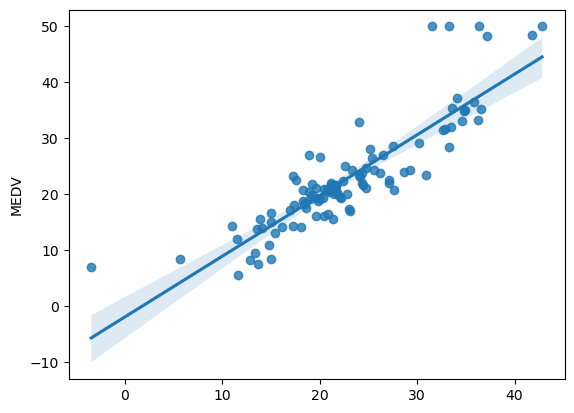

In [25]:
sns.regplot(x=predictions, y=y_test, data=x_train);

Los puntos representan la correlación entre las predicciones y los datos.

Podemos ver como la predicción y los datos de prueba son muy similares en la mitad de la gráfica mientras que en los extremos difieren notablemente.

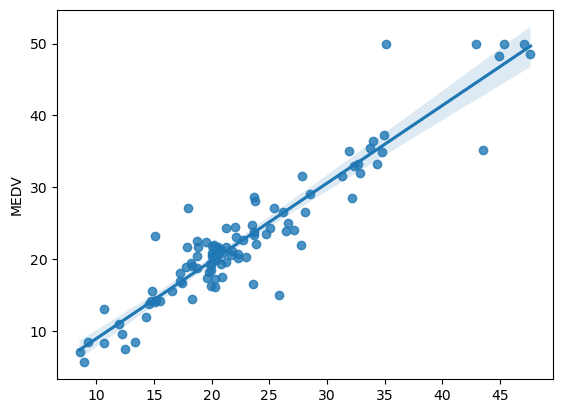

In [26]:
sns.regplot(x=predictionsRF, y=y_test, data=x_train);

Aquí vemos como en general la correlación entre las prediciones y los datos es bastante buena, hasta que llegamos a la punta donde se ve como un par de puntos se separan considerablemente.

Aunque algunos puntos en el medio estan algo separdos, ni es muchos y la mayoria estan bastante cerca de la línea por lo que podemos asumir que es bueno.

# Ejercicio 2
Compárales en base al MSE y al R2.

In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [43]:
R2_LR = r2_score(y_test, predictions)
MSE_LR = mean_squared_error(y_test, predictions)
R2_RF = r2_score(y_test, predictionsRF)
MSE_RF = mean_squared_error(y_test, predictionsRF)

In [44]:
print('El error cuadrático medio (MSE) en el modelo de regresión lineal es ',MSE_LR)

El error cuadrático medio (MSE) en el modelo de regresión lineal es  20.82024490084524


In [45]:
print('El error cuadrático medio (MSE) en el random forest regressor es ',MSE_RF)

El error cuadrático medio (MSE) en el random forest regressor es  11.139476637254905


In [46]:
print('El coeficiente de determinación (R2) en el modelo de regresión lineal es ', R2_LR)

El coeficiente de determinación (R2) en el modelo de regresión lineal es  0.7677545606448279


In [47]:
print('El coeficiente de determinación (R2) en el random forest regressor es ', R2_RF)

El coeficiente de determinación (R2) en el random forest regressor es  0.8757414882424889


Aquí calculamos tanto el error cuadratico medio como el coeficiente de determinación.

Estos son calculos que hacemos para hacer una evalución de la eficiencia de nuestro modelo.

R2: responde a la pregunta de si este modelo simple tiene un error mayor que el modelo de regresión lineal. En este caso, la mejor puntiación es 1.0.

MSE: Calcula la diferencia entre lo que dio y lo que debio dar, mientras más alto mayor la distancia de los valores.

Arriba tenemos los resultados númerico, pero abajo grafique los mismos datos para compararlos más facilmente.

Text(0.5, 1.0, 'Comparación de R2 Score entre Modelos')

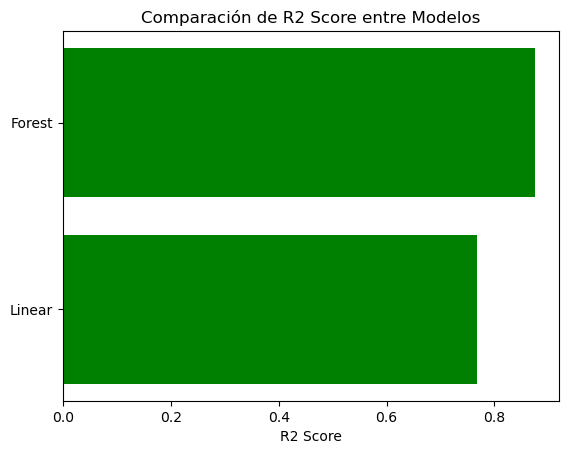

In [69]:
plt.barh(['Linear', 'Forest'], [R2_LR, R2_RF], color='green')
plt.xlabel('R2 Score')
plt.title('Comparación de R2 Score entre Modelos')

Aquí vemos el puntaje R2 y lo que vemos es como RandomForest esta más cerca del 1 que LinearRegression.

Por lo que según el coeficiente de deteminación, RandomForest es más preciso.

Text(0.5, 1.0, 'Comparación de MSE Score entre Modelos')

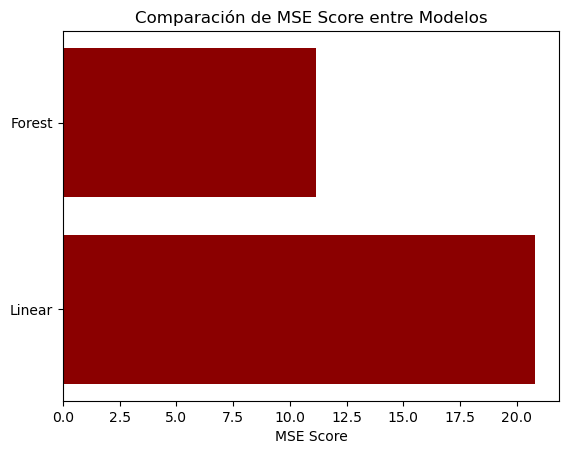

In [68]:
plt.barh(['Linear', 'Forest'], [MSE_LR, MSE_RF], color='darkred')
plt.xlabel('MSE Score')
plt.title('Comparación de MSE Score entre Modelos')

Ahora comparamos el MSE y vemos como esta vez como LinearRegression supera a RandomForest por un amplio margen. Pero como ya mencione antes, esto es malo.

Entonces tenemos que la distancia de los valores predichos y los reales son mayores en LinearRegression que en RandomForest.

Por lo que podemos concluir que según el error cuadrático medio: RandomForest es mejor modelo.

# Ejercicio 3
Entrenalos utilizando los diferentes parámetros que admiten para intentar mejorar su predicción.

In [33]:
from sklearn.model_selection import GridSearchCV

In [38]:
parametros_LR = {
    "fit_intercept" : [True, False],
    "copy_X" : [True, False],
    "n_jobs" : [1 , 3, 5],
    "positive" : [True, False]
                }
parametros_RF = {
    "criterion" : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    "max_depth" : [ 3, 6, 9],
    "n_jobs" : [1 , 3, 5],
    "min_samples_split" : [2, 4, 6]
                }

In [39]:
Modelos = [('Linear', LinearRegression(), parametros_LR), ('Forest', RandomForestRegressor(random_state = 42), parametros_RF)]

In [40]:
resultados_modelos = {}

for nombre, modelo, parametros in Modelos:
    print(f"Entrenando modelo: {nombre}")
    
    GS = GridSearchCV(estimator = modelo,
                  param_grid = parametros,
                  scoring = ["r2", "neg_mean_squared_error"],
                  refit = 'r2',
                  cv = 5,
                  verbose = 4
                 )
    GS.fit(x_train, y_train)
    
    resultados_modelos[nombre] = {
        "mejores_parametros": GS.best_params_,
        "mejor_resultado_r2": GS.best_score_,
        "resultados_mse": GS.cv_results_['mean_test_neg_mean_squared_error']
    }
    print("\n" + "="*40 + "\n")


Entrenando modelo: Linear
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; neg_mean_squared_error: (test=-32.978) r2: (test=0.609) total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; neg_mean_squared_error: (test=-40.803) r2: (test=0.364) total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; neg_mean_squared_error: (test=-40.852) r2: (test=0.484) total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; neg_mean_squared_error: (test=-24.222) r2: (test=0.683) total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; neg_mean_squared_error: (test=-44.947) r2: (test=0.579) total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; neg_mean_squared_error: (test=-20.900) r2: (test=0.752) total time=   0.0s
[CV 2/5] END copy_X=True, fit_inter

[CV 4/5] END copy_X=False, fit_intercept=False, n_jobs=1, positive=False; neg_mean_squared_error: (test=-17.454) r2: (test=0.771) total time=   0.0s
[CV 5/5] END copy_X=False, fit_intercept=False, n_jobs=1, positive=False; neg_mean_squared_error: (test=-36.138) r2: (test=0.662) total time=   0.0s
[CV 1/5] END copy_X=False, fit_intercept=False, n_jobs=3, positive=True; neg_mean_squared_error: (test=-36.367) r2: (test=0.568) total time=   0.0s
[CV 2/5] END copy_X=False, fit_intercept=False, n_jobs=3, positive=True; neg_mean_squared_error: (test=-33.937) r2: (test=0.471) total time=   0.0s
[CV 3/5] END copy_X=False, fit_intercept=False, n_jobs=3, positive=True; neg_mean_squared_error: (test=-50.060) r2: (test=0.368) total time=   0.0s
[CV 4/5] END copy_X=False, fit_intercept=False, n_jobs=3, positive=True; neg_mean_squared_error: (test=-42.028) r2: (test=0.450) total time=   0.0s
[CV 5/5] END copy_X=False, fit_intercept=False, n_jobs=3, positive=True; neg_mean_squared_error: (test=-56.844

[CV 3/5] END criterion=squared_error, max_depth=3, min_samples_split=6, n_jobs=1; neg_mean_squared_error: (test=-12.971) r2: (test=0.836) total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=3, min_samples_split=6, n_jobs=1; neg_mean_squared_error: (test=-11.717) r2: (test=0.847) total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=3, min_samples_split=6, n_jobs=1; neg_mean_squared_error: (test=-25.107) r2: (test=0.765) total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=3, min_samples_split=6, n_jobs=3; neg_mean_squared_error: (test=-14.629) r2: (test=0.826) total time=   0.9s
[CV 2/5] END criterion=squared_error, max_depth=3, min_samples_split=6, n_jobs=3; neg_mean_squared_error: (test=-18.091) r2: (test=0.718) total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=3, min_samples_split=6, n_jobs=3; neg_mean_squared_error: (test=-12.971) r2: (test=0.836) total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=3, min_sam

[CV 2/5] END criterion=squared_error, max_depth=6, min_samples_split=6, n_jobs=5; neg_mean_squared_error: (test=-15.970) r2: (test=0.751) total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=6, min_samples_split=6, n_jobs=5; neg_mean_squared_error: (test=-9.442) r2: (test=0.881) total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=6, min_samples_split=6, n_jobs=5; neg_mean_squared_error: (test=-7.300) r2: (test=0.904) total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=6, min_samples_split=6, n_jobs=5; neg_mean_squared_error: (test=-21.510) r2: (test=0.799) total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=9, min_samples_split=2, n_jobs=1; neg_mean_squared_error: (test=-11.102) r2: (test=0.868) total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=9, min_samples_split=2, n_jobs=1; neg_mean_squared_error: (test=-15.405) r2: (test=0.760) total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=9, min_sampl

[CV 5/5] END criterion=absolute_error, max_depth=3, min_samples_split=2, n_jobs=1; neg_mean_squared_error: (test=-28.412) r2: (test=0.734) total time=   0.5s
[CV 1/5] END criterion=absolute_error, max_depth=3, min_samples_split=2, n_jobs=3; neg_mean_squared_error: (test=-14.248) r2: (test=0.831) total time=   0.9s
[CV 2/5] END criterion=absolute_error, max_depth=3, min_samples_split=2, n_jobs=3; neg_mean_squared_error: (test=-18.710) r2: (test=0.708) total time=   0.2s
[CV 3/5] END criterion=absolute_error, max_depth=3, min_samples_split=2, n_jobs=3; neg_mean_squared_error: (test=-12.770) r2: (test=0.839) total time=   0.2s
[CV 4/5] END criterion=absolute_error, max_depth=3, min_samples_split=2, n_jobs=3; neg_mean_squared_error: (test=-10.100) r2: (test=0.868) total time=   0.2s
[CV 5/5] END criterion=absolute_error, max_depth=3, min_samples_split=2, n_jobs=3; neg_mean_squared_error: (test=-28.412) r2: (test=0.734) total time=   0.2s
[CV 1/5] END criterion=absolute_error, max_depth=3, 

[CV 2/5] END criterion=absolute_error, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-16.065) r2: (test=0.750) total time=   0.3s
[CV 3/5] END criterion=absolute_error, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-9.781) r2: (test=0.877) total time=   0.4s
[CV 4/5] END criterion=absolute_error, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-7.337) r2: (test=0.904) total time=   0.3s
[CV 5/5] END criterion=absolute_error, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-21.957) r2: (test=0.794) total time=   0.7s
[CV 1/5] END criterion=absolute_error, max_depth=6, min_samples_split=4, n_jobs=1; neg_mean_squared_error: (test=-11.607) r2: (test=0.862) total time=   0.9s
[CV 2/5] END criterion=absolute_error, max_depth=6, min_samples_split=4, n_jobs=1; neg_mean_squared_error: (test=-16.093) r2: (test=0.749) total time=   0.8s
[CV 3/5] END criterion=absolute_error, max_depth=6, mi

[CV 4/5] END criterion=absolute_error, max_depth=9, min_samples_split=4, n_jobs=1; neg_mean_squared_error: (test=-7.237) r2: (test=0.905) total time=   1.0s
[CV 5/5] END criterion=absolute_error, max_depth=9, min_samples_split=4, n_jobs=1; neg_mean_squared_error: (test=-20.112) r2: (test=0.812) total time=   1.0s
[CV 1/5] END criterion=absolute_error, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-10.721) r2: (test=0.873) total time=   0.9s
[CV 2/5] END criterion=absolute_error, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-15.839) r2: (test=0.753) total time=   0.4s
[CV 3/5] END criterion=absolute_error, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-9.410) r2: (test=0.881) total time=   0.3s
[CV 4/5] END criterion=absolute_error, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-7.237) r2: (test=0.905) total time=   0.3s
[CV 5/5] END criterion=absolute_error, max_depth=9, min

[CV 2/5] END criterion=friedman_mse, max_depth=3, min_samples_split=4, n_jobs=5; neg_mean_squared_error: (test=-18.158) r2: (test=0.717) total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=3, min_samples_split=4, n_jobs=5; neg_mean_squared_error: (test=-12.970) r2: (test=0.836) total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=3, min_samples_split=4, n_jobs=5; neg_mean_squared_error: (test=-11.733) r2: (test=0.846) total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=3, min_samples_split=4, n_jobs=5; neg_mean_squared_error: (test=-25.100) r2: (test=0.765) total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=3, min_samples_split=6, n_jobs=1; neg_mean_squared_error: (test=-14.466) r2: (test=0.828) total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=3, min_samples_split=6, n_jobs=1; neg_mean_squared_error: (test=-18.144) r2: (test=0.717) total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=3, min_samples_sp

[CV 1/5] END criterion=friedman_mse, max_depth=6, min_samples_split=6, n_jobs=3; neg_mean_squared_error: (test=-12.355) r2: (test=0.853) total time=   0.9s
[CV 2/5] END criterion=friedman_mse, max_depth=6, min_samples_split=6, n_jobs=3; neg_mean_squared_error: (test=-15.958) r2: (test=0.751) total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=6, min_samples_split=6, n_jobs=3; neg_mean_squared_error: (test=-9.326) r2: (test=0.882) total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=6, min_samples_split=6, n_jobs=3; neg_mean_squared_error: (test=-7.343) r2: (test=0.904) total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=6, min_samples_split=6, n_jobs=3; neg_mean_squared_error: (test=-21.418) r2: (test=0.799) total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=6, min_samples_split=6, n_jobs=5; neg_mean_squared_error: (test=-12.355) r2: (test=0.853) total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=6, min_samples_spli

[CV 4/5] END criterion=friedman_mse, max_depth=9, min_samples_split=6, n_jobs=5; neg_mean_squared_error: (test=-7.190) r2: (test=0.906) total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=9, min_samples_split=6, n_jobs=5; neg_mean_squared_error: (test=-19.569) r2: (test=0.817) total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=3, min_samples_split=2, n_jobs=1; neg_mean_squared_error: (test=-59.684) r2: (test=0.292) total time=   0.1s
[CV 2/5] END criterion=poisson, max_depth=3, min_samples_split=2, n_jobs=1; neg_mean_squared_error: (test=-70.277) r2: (test=-0.095) total time=   0.1s
[CV 3/5] END criterion=poisson, max_depth=3, min_samples_split=2, n_jobs=1; neg_mean_squared_error: (test=-73.941) r2: (test=0.067) total time=   0.1s
[CV 4/5] END criterion=poisson, max_depth=3, min_samples_split=2, n_jobs=1; neg_mean_squared_error: (test=-62.783) r2: (test=0.178) total time=   0.1s
[CV 5/5] END criterion=poisson, max_depth=3, min_samples_split=2, n_jobs=1; neg_mean

[CV 5/5] END criterion=poisson, max_depth=6, min_samples_split=2, n_jobs=3; neg_mean_squared_error: (test=-58.034) r2: (test=0.457) total time=   0.1s
[CV 1/5] END criterion=poisson, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-43.338) r2: (test=0.486) total time=   0.1s
[CV 2/5] END criterion=poisson, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-55.031) r2: (test=0.142) total time=   0.1s
[CV 3/5] END criterion=poisson, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-53.861) r2: (test=0.320) total time=   0.1s
[CV 4/5] END criterion=poisson, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-39.133) r2: (test=0.488) total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-58.034) r2: (test=0.457) total time=   0.1s
[CV 1/5] END criterion=poisson, max_depth=6, min_samples_split=4, n_jobs=1; neg_mean_squared_e

[CV 5/5] END criterion=poisson, max_depth=9, min_samples_split=4, n_jobs=1; neg_mean_squared_error: (test=-50.985) r2: (test=0.523) total time=   0.2s
[CV 1/5] END criterion=poisson, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-41.683) r2: (test=0.505) total time=   0.9s
[CV 2/5] END criterion=poisson, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-51.181) r2: (test=0.202) total time=   0.1s
[CV 3/5] END criterion=poisson, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-43.569) r2: (test=0.450) total time=   0.1s
[CV 4/5] END criterion=poisson, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-30.982) r2: (test=0.594) total time=   0.1s
[CV 5/5] END criterion=poisson, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-50.985) r2: (test=0.523) total time=   0.1s
[CV 1/5] END criterion=poisson, max_depth=9, min_samples_split=4, n_jobs=5; neg_mean_squared_e

In [41]:
for nombre_modelo, resultados in resultados_modelos.items():
    print(f"Resultados para {nombre_modelo}:")
    print(f"Mejores parámetros: {resultados['mejores_parametros']}")
    print(f"Mejor resultado para R2: {resultados['mejor_resultado_r2']}")
    print(f"Resultados de MSE: {resultados['resultados_mse']}")
    print("\n" + "="*40 + "\n")

Resultados para Linear:
Mejores parámetros: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Mejor resultado para R2: 0.6878128375852393
Resultados de MSE: [-36.76048844 -25.39246058 -36.76048844 -25.39246058 -36.76048844
 -25.39246058 -43.84718698 -25.39246058 -43.84718698 -25.39246058
 -43.84718698 -25.39246058 -36.76048844 -25.39246058 -36.76048844
 -25.39246058 -36.76048844 -25.39246058 -43.84718698 -25.39246058
 -43.84718698 -25.39246058 -43.84718698 -25.39246058]


Resultados para Forest:
Mejores parámetros: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 2, 'n_jobs': 1}
Mejor resultado para R2: 0.8486041634526533
Resultados de MSE: [-16.50082907 -16.50082907 -16.50082907 -16.50283426 -16.50283426
 -16.50283426 -16.50302974 -16.50302974 -16.50302974 -13.17623182
 -13.17623182 -13.17623182 -13.25033336 -13.25033336 -13.25033336
 -13.35289441 -13.35289441 -13.35289441 -12.34242599 -12.34242599
 -12.34242599 -12.46299451 -12.46299451 -12.46

Text(0.5, 1.0, 'Comparación de R2 Score entre Modelos')

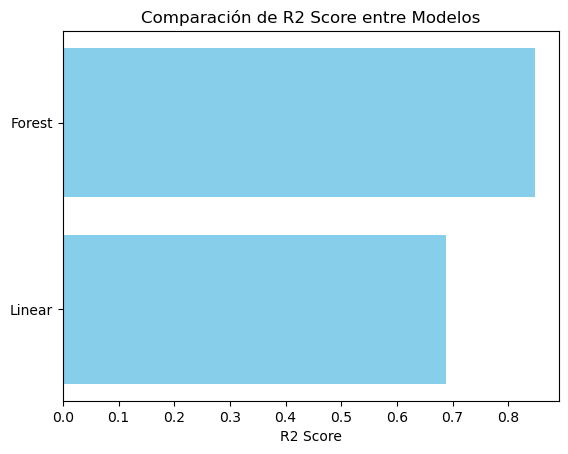

In [67]:
nombres_modelos = list(resultados_modelos.keys())

resultados_r2 = [resultados_modelos[nombre]["mejor_resultado_r2"] for nombre in nombres_modelos]

plt.barh(nombres_modelos, resultados_r2, color='skyblue')
plt.xlabel('R2 Score')
plt.title('Comparación de R2 Score entre Modelos')

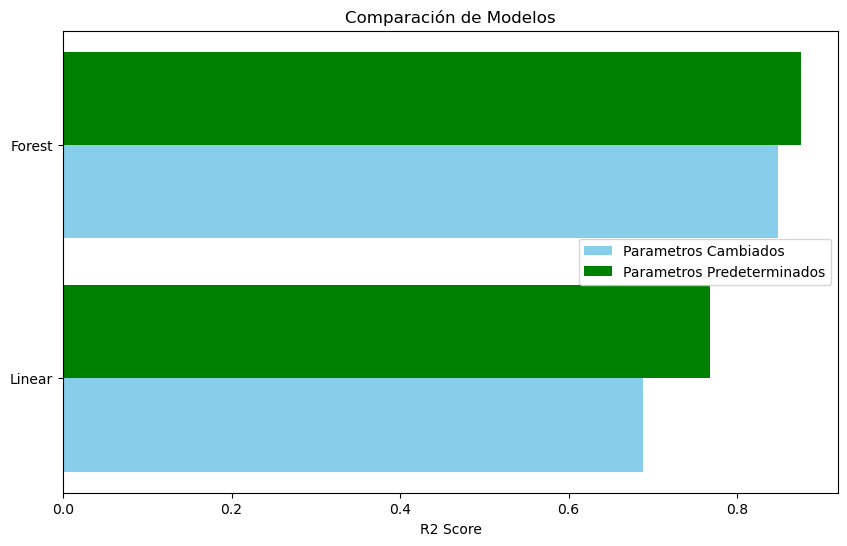

In [87]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4

posiciones_r2 = np.arange(len(nombres_modelos))
posiciones_resultados = posiciones_r2 + bar_width

ax.barh(posiciones_r2, resultados_r2, height=bar_width, color='skyblue', label='Parametros Cambiados')

ax.barh(posiciones_resultados, [R2_LR, R2_RF], height=bar_width, color='green', label='Parametros Predeterminados')

ax.set_yticks(posiciones_r2 + bar_width / 2)
ax.set_yticklabels(nombres_modelos)
ax.set_xlabel('R2 Score')
ax.set_title('Comparación de Modelos')
ax.legend()

---

# Ejercicio 5
No utilices la variable del número de habitaciones ( RM ) a la hora de realizar predicciones.

In [7]:
x = x.drop('RM', axis = 1)

---